In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input
from keras import optimizers
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from keras.layers import Bidirectional
from wordcloud import WordCloud
import re
from wordcloud import STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk import ngrams
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stock='/content/drive/MyDrive/Colab Notebooks/sp500.csv'
nlp='/content/drive/MyDrive/Colab Notebooks/reuters_headlines.csv'
data1=pd.read_csv(stock)
news=pd.read_csv(nlp)

In [ ]:
data1.shape

(589, 7)

In [ ]:
news.shape

(32770, 3)

In [ ]:
data1.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,589
Change %,0


In [ ]:
news.isnull().sum()

,0
Headlines,0
Time,0
Description,0


In [ ]:
data1

,Date,Price,Open,High,Low,Vol.,Change %
0,7/20/2020,3251.84,3224.29,3258.61,3215.16,NaN,0.84%
1,7/17/2020,3224.73,3224.21,3233.52,3205.65,NaN,0.28%
2,7/16/2020,3215.57,3208.36,3220.39,3198.59,NaN,-0.34%
3,7/15/2020,3226.56,3225.98,3238.28,3200.76,NaN,0.91%
4,7/14/2020,3197.52,3141.11,3200.95,3127.66,NaN,1.34%
...,...,...,...,...,...,...,...
584,3/23/2018,2588.26,2646.71,2657.67,2585.89,NaN,-2.10%
585,3/22/2018,2643.69,2691.36,2695.68,2641.59,NaN,-2.52%
586,3/21/2018,2711.93,2714.99,2739.14,2709.79,NaN,-0.18%
587,3/20/2018,2716.94,2715.05,2724.22,2710.05,NaN,0.15%


In [ ]:
from dateutil.parser import parse

data1['Date'] = data1['Date'].apply(lambda x: parse(x, fuzzy_with_tokens=True)[0] if pd.notna(x) else pd.NaT)

In [ ]:
data1

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-07-20,3251.84,3224.29,3258.61,3215.16,NaN,0.84%
1,2020-07-17,3224.73,3224.21,3233.52,3205.65,NaN,0.28%
2,2020-07-16,3215.57,3208.36,3220.39,3198.59,NaN,-0.34%
3,2020-07-15,3226.56,3225.98,3238.28,3200.76,NaN,0.91%
4,2020-07-14,3197.52,3141.11,3200.95,3127.66,NaN,1.34%
...,...,...,...,...,...,...,...
584,2018-03-23,2588.26,2646.71,2657.67,2585.89,NaN,-2.10%
585,2018-03-22,2643.69,2691.36,2695.68,2641.59,NaN,-2.52%
586,2018-03-21,2711.93,2714.99,2739.14,2709.79,NaN,-0.18%
587,2018-03-20,2716.94,2715.05,2724.22,2710.05,NaN,0.15%


In [ ]:
data=data1[::-1]
data

,Date,Price,Open,High,Low,Vol.,Change %
588,2018-03-19,2712.92,2741.38,2741.38,2694.59,NaN,-1.42%
587,2018-03-20,2716.94,2715.05,2724.22,2710.05,NaN,0.15%
586,2018-03-21,2711.93,2714.99,2739.14,2709.79,NaN,-0.18%
585,2018-03-22,2643.69,2691.36,2695.68,2641.59,NaN,-2.52%
584,2018-03-23,2588.26,2646.71,2657.67,2585.89,NaN,-2.10%
...,...,...,...,...,...,...,...
4,2020-07-14,3197.52,3141.11,3200.95,3127.66,NaN,1.34%
3,2020-07-15,3226.56,3225.98,3238.28,3200.76,NaN,0.91%
2,2020-07-16,3215.57,3208.36,3220.39,3198.59,NaN,-0.34%
1,2020-07-17,3224.73,3224.21,3233.52,3205.65,NaN,0.28%


In [ ]:
news

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [ ]:
news1=news[::-1]
news1

,Headlines,Time,Description
32769,UK will always consider ways to improve data l...,Mar 20 2018,Britain will consider any suggestions to give ...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
...,...,...,...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...


In [ ]:
from dateutil.parser import parse

news1['Time'] = news1['Time'].apply(lambda x: parse(x, fuzzy_with_tokens=True)[0] if pd.notna(x) else pd.NaT)

In [ ]:
news1

,Headlines,Time,Description
32769,UK will always consider ways to improve data l...,2018-03-20,Britain will consider any suggestions to give ...
32768,Pratt & Whitney to deliver spare A320neo engin...,2018-03-20,Pratt & Whitney will soon begin deliveries of ...
32767,McDonald's sets greenhouse gas reduction targets,2018-03-20,McDonald's Corp on Tuesday announced an approv...
32766,Prosecutors search Volkswagen headquarters in ...,2018-03-20,German prosecutors said on Tuesday they had se...
32765,Malaysia says never hired British data firm at...,2018-03-20,The Malaysian government and the ruling party ...
...,...,...,...
4,U.S. Republicans seek liability protections as...,2020-07-17,A battle in the U.S. Congress over a new coron...
3,Twitter says attackers downloaded data from up...,2020-07-18,Twitter Inc said on Saturday that hackers were...
2,Trail of missing Wirecard executive leads to B...,2020-07-18,Former Wirecard chief operating officer Jan M...
1,Disney cuts ad spending on Facebook amid growi...,2020-07-18,Walt Disney has become the latest company to ...


In [ ]:
def gen_freq(text):
  word_list=[]

  for words in text.split():
    word_list.extend(words)

  word_freq=pd.Series(word_list).value_counts()
  word_freq[:20]

  return word_freq

gen_freq(news1.Headlines.str)

,count
to,12489
in,6453
U.S.,6238
on,4693
for,4414
...,...
fuss,1
TLTRO,1
loans?,1
Kale,1


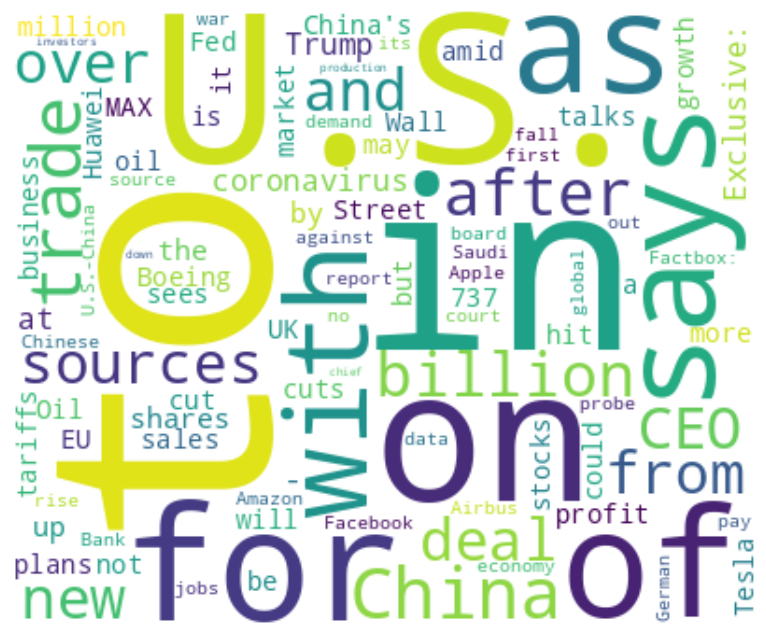

In [ ]:
word_freq=gen_freq(news1.Headlines.str)
w=WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def clean_text(text):
    text=re.sub(r'RT', '', text)
    text = re.sub(r'&amp;', '&', text)

    text = re.sub(r'[?!.;:,#@-]', '', text)

    text = text.lower()
    return text

In [ ]:
news1['clean_text'] = news1.Headlines.apply(lambda x: clean_text(x))
news1

,Headlines,Time,Description,clean_text
32769,UK will always consider ways to improve data l...,2018-03-20,Britain will consider any suggestions to give ...,uk will always consider ways to improve data l...
32768,Pratt & Whitney to deliver spare A320neo engin...,2018-03-20,Pratt & Whitney will soon begin deliveries of ...,pratt & whitney to deliver spare a320neo engin...
32767,McDonald's sets greenhouse gas reduction targets,2018-03-20,McDonald's Corp on Tuesday announced an approv...,mcdonald's sets greenhouse gas reduction targets
32766,Prosecutors search Volkswagen headquarters in ...,2018-03-20,German prosecutors said on Tuesday they had se...,prosecutors search volkswagen headquarters in ...
32765,Malaysia says never hired British data firm at...,2018-03-20,The Malaysian government and the ruling party ...,malaysia says never hired british data firm at...
...,...,...,...,...
4,U.S. Republicans seek liability protections as...,2020-07-17,A battle in the U.S. Congress over a new coron...,us republicans seek liability protections as c...
3,Twitter says attackers downloaded data from up...,2020-07-18,Twitter Inc said on Saturday that hackers were...,twitter says attackers downloaded data from up...
2,Trail of missing Wirecard executive leads to B...,2020-07-18,Former Wirecard chief operating officer Jan M...,trail of missing wirecard executive leads to b...
1,Disney cuts ad spending on Facebook amid growi...,2020-07-18,Walt Disney has become the latest company to ...,disney cuts ad spending on facebook amid growi...


In [ ]:
print(STOPWORDS)

{"didn't", 'most', "wasn't", 'am', "wouldn't", 'ourselves', 'would', 'what', 'from', 'can', 'however', 'were', 'above', 'herself', "they've", 'after', 'once', 'are', 'their', 'been', 'did', "i'd", 'over', 'doing', 'him', 'in', 'have', 'on', 'our', 'both', 'own', 'you', 'then', 'she', 'should', 'they', "it's", 'does', "you'd", 'no', "shan't", "won't", 'k', 'those', 'against', 'is', 'other', 'and', "you've", 'down', 'himself', 'since', 'has', "he'll", 'these', "mustn't", 'a', 'when', 'because', 'through', 'between', 'ever', "we'd", 'of', 'just', 'he', 'hence', 'there', 'but', "we've", "we'll", 'whom', 'or', 'could', "hasn't", 'his', "shouldn't", 'too', 'how', "we're", 'any', 'yourself', "doesn't", 'do', 'be', "haven't", 'up', "you're", 'r', 'which', 'during', 'not', "they'll", 'was', "he's", "how's", 'so', 'themselves', 'further', "where's", 'that', 'again', 'also', 'at', "when's", "i've", 'an', 'www', 'your', "i'll", 'get', "what's", "that's", 'being', 'my', "hadn't", 'below', "there's"

In [ ]:
news3 = news1.Headlines.apply(lambda x: clean_text(x))
word_freq = gen_freq(news3.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

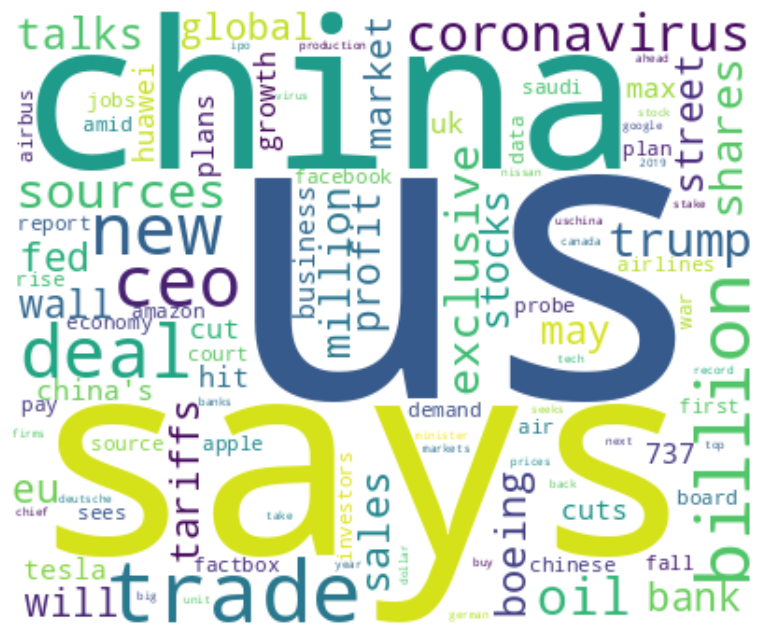

In [ ]:
w=WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
analyzer = SentimentIntensityAnalyzer()
news1['polarity'] = news1['clean_text'].apply(lambda x: analyzer.polarity_scores(x))
news1.head(10)

,Headlines,Time,Description,clean_text,polarity
32769,UK will always consider ways to improve data l...,2018-03-20,Britain will consider any suggestions to give ...,uk will always consider ways to improve data l...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp..."
32768,Pratt & Whitney to deliver spare A320neo engin...,2018-03-20,Pratt & Whitney will soon begin deliveries of ...,pratt & whitney to deliver spare a320neo engin...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
32767,McDonald's sets greenhouse gas reduction targets,2018-03-20,McDonald's Corp on Tuesday announced an approv...,mcdonald's sets greenhouse gas reduction targets,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
32766,Prosecutors search Volkswagen headquarters in ...,2018-03-20,German prosecutors said on Tuesday they had se...,prosecutors search volkswagen headquarters in ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
32765,Malaysia says never hired British data firm at...,2018-03-20,The Malaysian government and the ruling party ...,malaysia says never hired british data firm at...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
32764,EU demands 'unilateral' power over UK banks' a...,2018-03-20,European Union governments will insist on thei...,eu demands 'unilateral' power over uk banks' a...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
32763,White House welcomes looks into reports Trump'...,2018-03-20,President Donald Trump wants Americans' privac...,white house welcomes looks into reports trump'...,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp..."
32762,Kenya's ruling party says hired firm linked to...,2018-03-20,Kenya's ruling Jubilee party said on Tuesday i...,kenya's ruling party says hired firm linked to...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
32761,Exxon eyes Gulf of Mexico plastics plant to me...,2018-03-20,Exxon Mobil Corp said on Tuesday it was plann...,exxon eyes gulf of mexico plastics plant to me...,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou..."
32760,BMW searched by German police in emissions swoop,2018-03-20,BMW's headquarters were raided on Tuesday by G...,bmw searched by german police in emissions swoop,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
news1 = pd.concat([news1['Time'], news1['polarity'].apply(pd.Series)], axis=1)

In [ ]:
news1

,Time,neg,neu,pos,compound
32769,2018-03-20,0.000,0.791,0.209,0.4404
32768,2018-03-20,0.000,1.000,0.000,0.0000
32767,2018-03-20,0.000,1.000,0.000,0.0000
32766,2018-03-20,0.000,1.000,0.000,0.0000
32765,2018-03-20,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
4,2020-07-17,0.462,0.538,0.000,-0.6124
3,2020-07-18,0.270,0.730,0.000,-0.5719
2,2020-07-18,0.180,0.820,0.000,-0.2960
1,2020-07-18,0.341,0.530,0.129,-0.4215


In [ ]:
news_avg =news1.groupby('Time')['compound'].mean().reset_index()

In [ ]:
news_avg.rename(columns={'compound': 'avg'}, inplace=True)

In [ ]:
news_avg.rename(columns={'Time': 'Date'}, inplace=True)

In [ ]:
news_avg

,Date,avg
0,2018-03-20,-0.053068
1,2018-03-21,0.014061
2,2018-03-22,-0.040645
3,2018-03-23,-0.016389
4,2018-03-24,0.005636
...,...,...
847,2020-07-14,-0.039237
848,2020-07-15,0.035296
849,2020-07-16,-0.039327
850,2020-07-17,-0.027740


In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %
588,2018-03-19,2712.92,2741.38,2741.38,2694.59,NaN,-1.42%
587,2018-03-20,2716.94,2715.05,2724.22,2710.05,NaN,0.15%
586,2018-03-21,2711.93,2714.99,2739.14,2709.79,NaN,-0.18%
585,2018-03-22,2643.69,2691.36,2695.68,2641.59,NaN,-2.52%
584,2018-03-23,2588.26,2646.71,2657.67,2585.89,NaN,-2.10%
...,...,...,...,...,...,...,...
4,2020-07-14,3197.52,3141.11,3200.95,3127.66,NaN,1.34%
3,2020-07-15,3226.56,3225.98,3238.28,3200.76,NaN,0.91%
2,2020-07-16,3215.57,3208.36,3220.39,3198.59,NaN,-0.34%
1,2020-07-17,3224.73,3224.21,3233.52,3205.65,NaN,0.28%


In [ ]:
df2 = pd.merge(news_avg[['Date', 'avg']], data[['Date', 'Price']], on='Date', how='inner')

In [ ]:
df2

,Date,avg,Price
0,2018-03-20,-0.053068,2716.94
1,2018-03-21,0.014061,2711.93
2,2018-03-22,-0.040645,2643.69
3,2018-03-23,-0.016389,2588.26
4,2018-03-26,0.017955,2658.55
...,...,...,...
582,2020-07-13,0.072922,3155.22
583,2020-07-14,-0.039237,3197.52
584,2020-07-15,0.035296,3226.56
585,2020-07-16,-0.039327,3215.57


In [ ]:
data_train = df2[0:np.int16(0.8*len(df2))]
data_test = df2[np.int16(0.8*len(df2)):]

In [ ]:
mean_price = data_train['Price'].mean()
std_price = data_train['Price'].std()

data_train['price_zscore'] = (data_train['Price'] - mean_price) / std_price

<ipython-input-65-76831ff33448>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['price_zscore'] = (data_train['Price'] - mean_price) / std_price


In [ ]:
data_train = data_train.drop(columns=['Date', 'Price'])

In [ ]:
data_train

,avg,price_zscore
0,-0.053068,-0.794267
1,0.014061,-0.822548
2,-0.040645,-1.207757
3,-0.016389,-1.520655
4,0.017955,-1.123874
...,...,...
464,-0.009534,2.641229
465,0.038189,2.471487
466,-0.035752,2.178854
467,-0.020612,2.362935


In [ ]:
data = data_train.values

x_train = []
y_train = []

for i in range(len(data) - 5):
    x_train.append(data[i:i+5])
    y_train.append(data[i+5])

x_train = np.array(x_train)
y_train = np.array(y_train)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3804
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3894
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4131
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3936
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3911
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4082
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4030
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3734
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3996
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4062
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3687
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3764
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3915
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3841
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3902
Ep

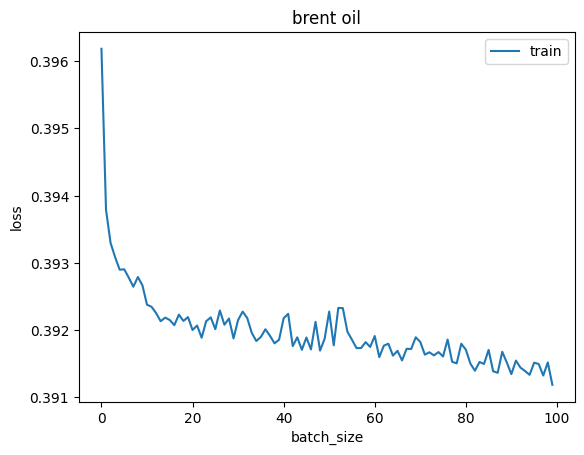

In [ ]:
from typing import Sequence
model = Sequential()
tf.keras.layers.Conv1D(64, 1, activation='relu',  input_shape=(x_train.shape[1], x_train.shape[2]))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')
history=model.fit(x_train,y_train, epochs=100, batch_size=20)
plt.plot(history.history['loss'], label='train')
plt.title('brent oil')
plt.ylabel('loss')
plt.xlabel('batch_size')
plt.legend()
plt.show()

In [ ]:
data_test

,Date,avg,Price
469,2020-01-30,0.011734,3283.66
470,2020-01-31,-0.089829,3225.52
471,2020-02-03,-0.007303,3248.92
472,2020-02-04,0.011120,3297.59
473,2020-02-05,0.077756,3334.69
...,...,...,...
582,2020-07-13,0.072922,3155.22
583,2020-07-14,-0.039237,3197.52
584,2020-07-15,0.035296,3226.56
585,2020-07-16,-0.039327,3215.57


In [ ]:
mean_price = data_test['Price'].mean()
std_price = data_test['Price'].std()

data_test['price_zscore_z'] = (data_test['Price'] - mean_price) / std_price

<ipython-input-72-1a722cd3c4bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['price_zscore_z'] = (data_test['Price'] - mean_price) / std_price


In [ ]:
data_test

,Date,avg,Price,price_zscore_z
469,2020-01-30,0.011734,3283.66,1.188567
470,2020-01-31,-0.089829,3225.52,0.971395
471,2020-02-03,-0.007303,3248.92,1.058802
472,2020-02-04,0.011120,3297.59,1.240600
473,2020-02-05,0.077756,3334.69,1.379180
...,...,...,...,...
582,2020-07-13,0.072922,3155.22,0.708802
583,2020-07-14,-0.039237,3197.52,0.866806
584,2020-07-15,0.035296,3226.56,0.975280
585,2020-07-16,-0.039327,3215.57,0.934229


In [ ]:
data_test2 = data_test.drop(columns=['Date', 'Price'])

In [ ]:
data3 = data_test2.values

x_test = []
y_test = []

for i in range(len(data3) - 5):
    x_test.append(data3[i:i+5])
    y_test.append(data3[i+5])

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
predictions = model.predict(x_test)
predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


array([[ 0.2276222 ],
       [ 0.24632904],
       [ 0.22908501],
       [ 0.21476297],
       [ 0.20491983],
       [ 0.25069523],
       [ 0.2445202 ],
       [ 0.23097014],
       [ 0.18425858],
       [ 0.18883257],
       [ 0.20270279],
       [ 0.21557234],
       [ 0.13141176],
       [ 0.02865913],
       [ 0.01264658],
       [-0.02627104],
       [-0.01106407],
       [ 0.07128957],
       [ 0.05534215],
       [ 0.13502479],
       [ 0.0911305 ],
       [ 0.0195484 ],
       [-0.17823656],
       [-0.14071326],
       [-0.26139507],
       [-0.5645943 ],
       [-0.4001953 ],
       [-0.8766759 ],
       [-0.75301015],
       [-1.0988346 ],
       [-1.0654564 ],
       [-1.3855773 ],
       [-1.4621475 ],
       [-1.025707  ],
       [-1.1322243 ],
       [-0.71833855],
       [-1.009132  ],
       [-0.68706894],
       [-0.761919  ],
       [-0.8911254 ],
       [-0.81802505],
       [-0.88850003],
       [-0.57692564],
       [-0.62863225],
       [-0.42585254],
       [-0

In [ ]:
mean_price = data_test['Price'].mean()
std_price = data_test['Price'].std()

In [ ]:
predictions_r = (predictions * std_price) + mean_price
predictions_r

array([[3026.4011],
       [3031.4092],
       [3026.7927],
       [3022.9585],
       [3020.3235],
       [3032.5781],
       [3030.925 ],
       [3027.2974],
       [3014.792 ],
       [3016.0166],
       [3019.73  ],
       [3023.1753],
       [3000.6443],
       [2973.1357],
       [2968.849 ],
       [2958.4302],
       [2962.5015],
       [2984.5486],
       [2980.2793],
       [3001.6116],
       [2989.8604],
       [2970.6968],
       [2917.7468],
       [2927.7925],
       [2895.4841],
       [2814.3132],
       [2858.3252],
       [2730.7644],
       [2763.8716],
       [2671.2893],
       [2680.225 ],
       [2594.5242],
       [2574.0251],
       [2690.8667],
       [2662.3503],
       [2773.1538],
       [2695.304 ],
       [2781.525 ],
       [2761.4866],
       [2726.8962],
       [2746.466 ],
       [2727.5989],
       [2811.012 ],
       [2797.1694],
       [2851.4565],
       [2871.2532],
       [2875.9907],
       [2910.0835],
       [2897.2092],
       [2905.49  ],


In [ ]:
mae = mean_absolute_error(data_test['Price'][5:],predictions_r)
mae

143.7746540548949

In [ ]:
predictions_r = predictions_r.flatten()
mape = np.mean(np.abs((data_test['Price'][5:] - predictions_r) / data_test['Price'][5:])) * 100
mape

4.940208521060552

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(data_test['Price'][5:], predictions_r)
r_squared

0.5324261017015931